In [3]:
import rioxarray
import os
import random
import matplotlib.pyplot as plt

In [23]:
def plot_random_predictions(num_plots=5, source_dir = '/home/workdir/kenya_output_skipatt'):
    pred_dir = os.path.join(source_dir, 'hardened_prob')
    fig, axes = plt.subplots(num_plots, 3, figsize=(12, (5*num_plots)))
    tif_files = [file for file in os.listdir(pred_dir) if file.endswith('.tif')]
    for i in range(num_plots):
        tif = tif_files[(i)*20]
        exampleimg = rioxarray.open_rasterio('/home/data/kenya/images/'+tif[9:])
        examplelbl = rioxarray.open_rasterio('/home/data/kenya/labels/'+tif[9:])
        predictedlbl = rioxarray.open_rasterio(os.path.join(pred_dir, tif))
        row_axes = axes[i]

        # Plot images on the current row of subplots
        exampleimg.plot.imshow(ax=row_axes[0])
        row_axes[0].set_title('Example Image')

        examplelbl.plot(ax=row_axes[1], vmin=0, vmax=3, add_colorbar=False)
        row_axes[1].set_title('Example Label')
        

        examplelbl.plot(ax=row_axes[2], vmin=0, vmax=3, add_colorbar=False)
        row_axes[2].set_title('Refined Label')
        


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.savefig('example_plots.png')

In [42]:
def compare_random_predictions(num_plots=5, source_dir_1 = '/home/workdir/kenya_output_skipatt', source_dir_2 = '/home/workdir/kenya_output_skipatt_smoothlow'):
    pred_dir_1 = os.path.join(source_dir_1, 'hardened_prob')
    pred_dir_2 = os.path.join(source_dir_2, 'hardened_prob')
    fig, axes = plt.subplots(num_plots, 4, figsize=(16, (5*num_plots)))
    tif_files = [file for file in os.listdir(pred_dir_1) if file.endswith('.tif')]
    for i in range(num_plots):
        tif = tif_files[(i)*20]
        exampleimg = rioxarray.open_rasterio('/home/data/kenya/images/'+tif[9:])
        examplelbl = rioxarray.open_rasterio('/home/data/kenya/labels/'+tif[9:])
        predictedlbl1 = rioxarray.open_rasterio(os.path.join(pred_dir_1, tif))
        predictedlbl2 = rioxarray.open_rasterio(os.path.join(pred_dir_2, tif))
        row_axes = axes[i]

        # Plot images on the current row of subplots
        exampleimg.plot.imshow(ax=row_axes[0])
        row_axes[0].set_title('Example Image')

        examplelbl.plot(ax=row_axes[1], vmin=0, vmax=3)
        row_axes[1].set_title('Example Label')

        predictedlbl1.plot(ax=row_axes[2], vmin=0, vmax=3)
        row_axes[2].set_title('Predicted Label (Smooth=1)')

        predictedlbl2.plot(ax=row_axes[3], vmin=0, vmax=3)
        row_axes[3].set_title('Predicted Label (Smooth=0.5)')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.savefig(os.path.join(source_dir_1, 'predict_vis_compare.png'))

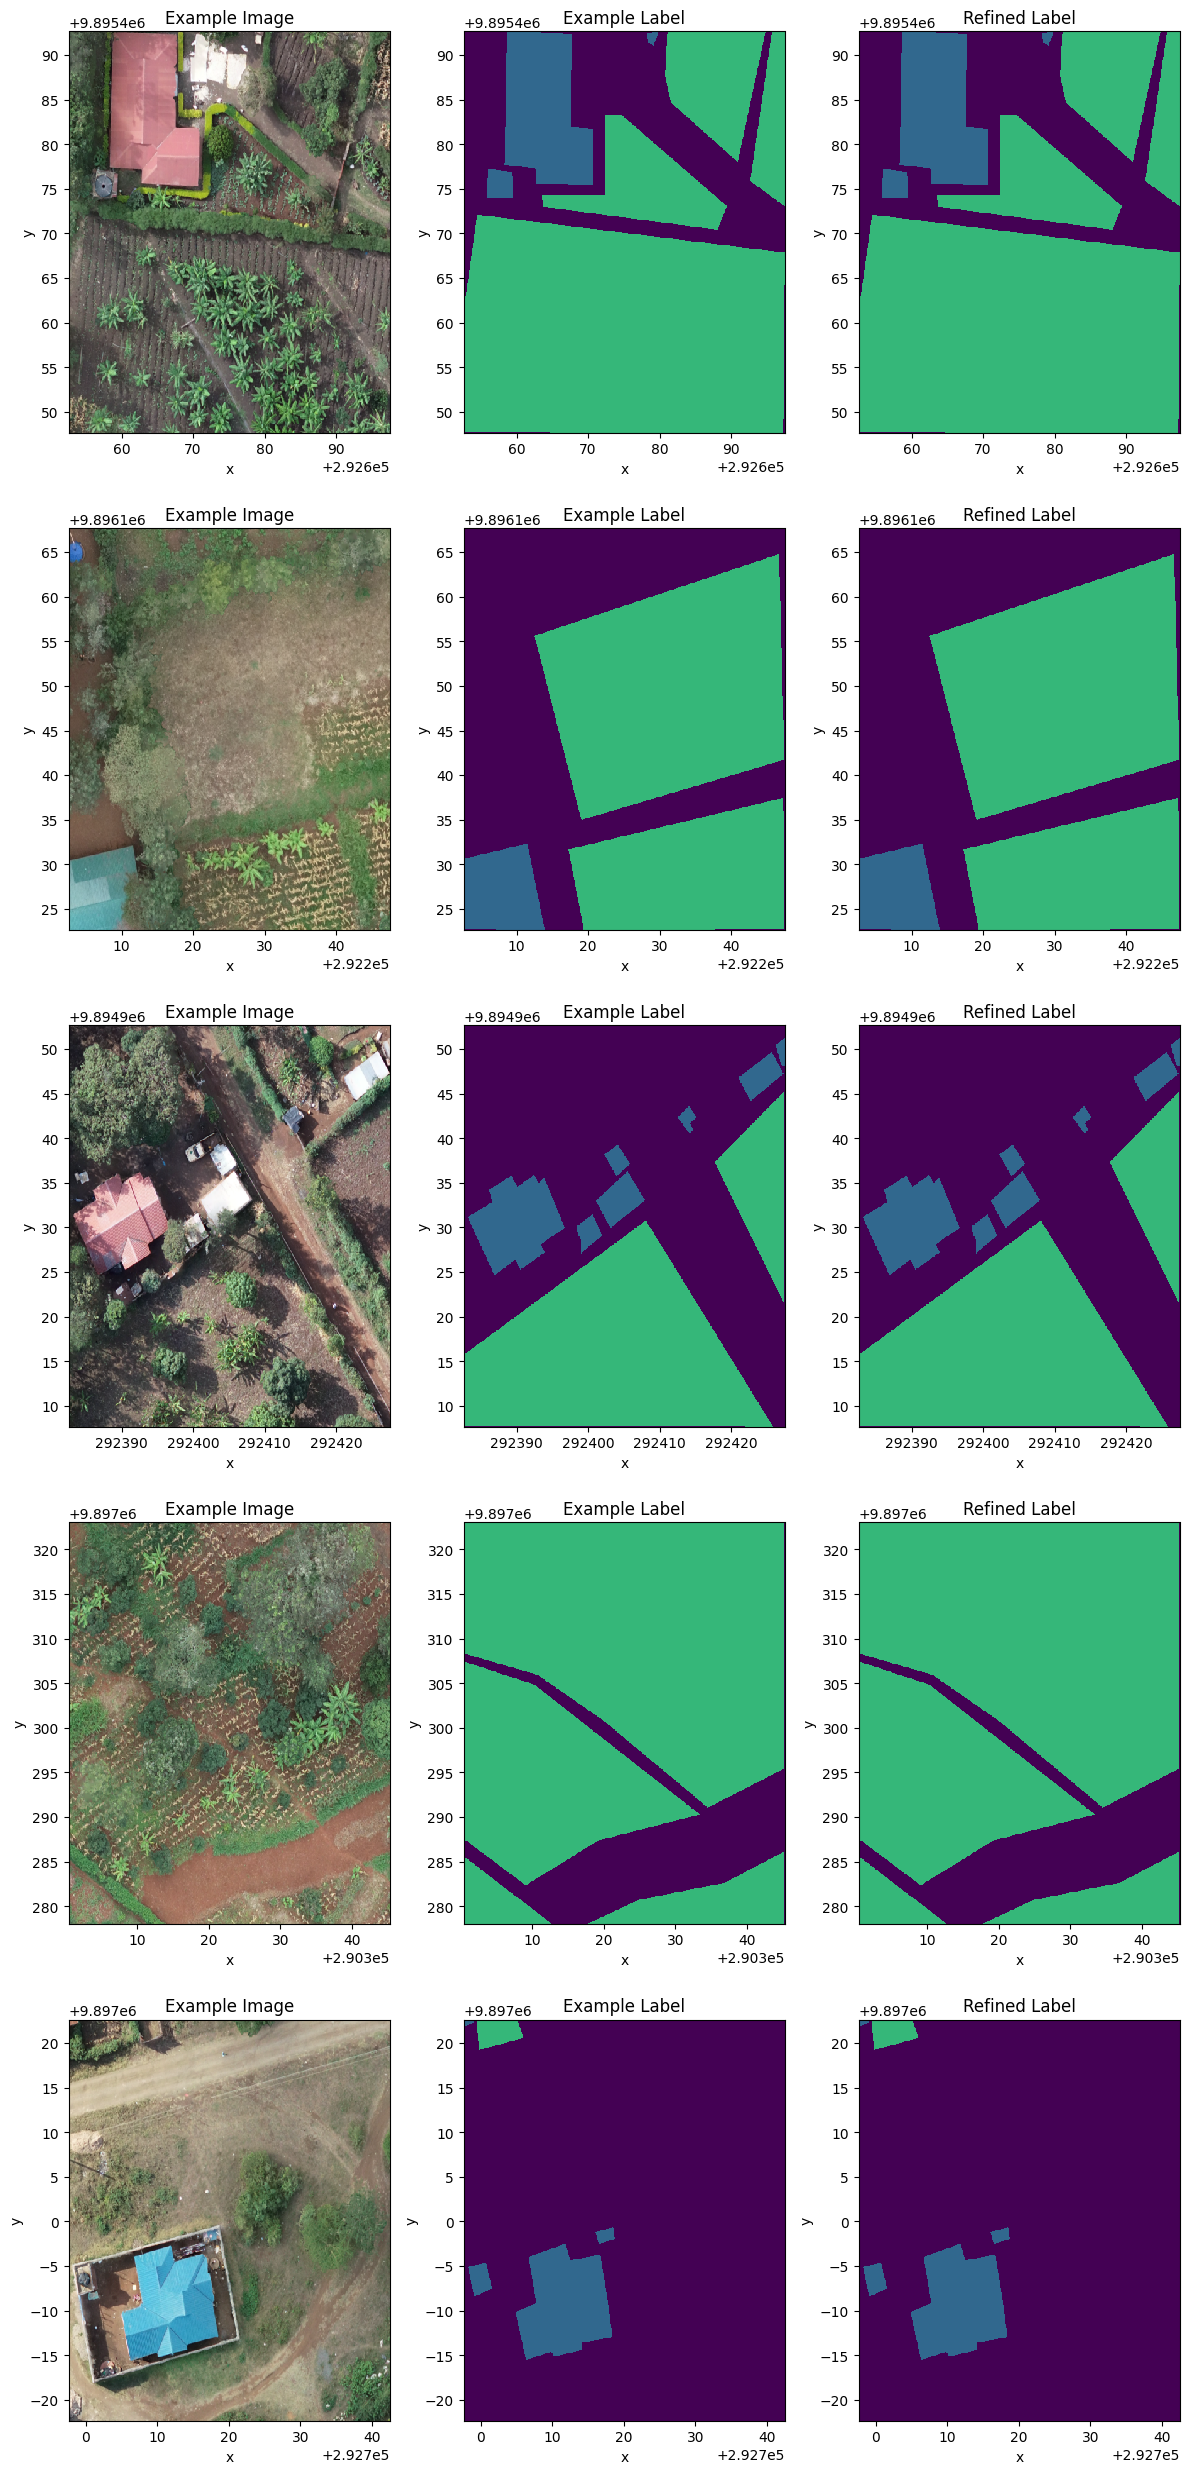

In [24]:
plot_random_predictions()

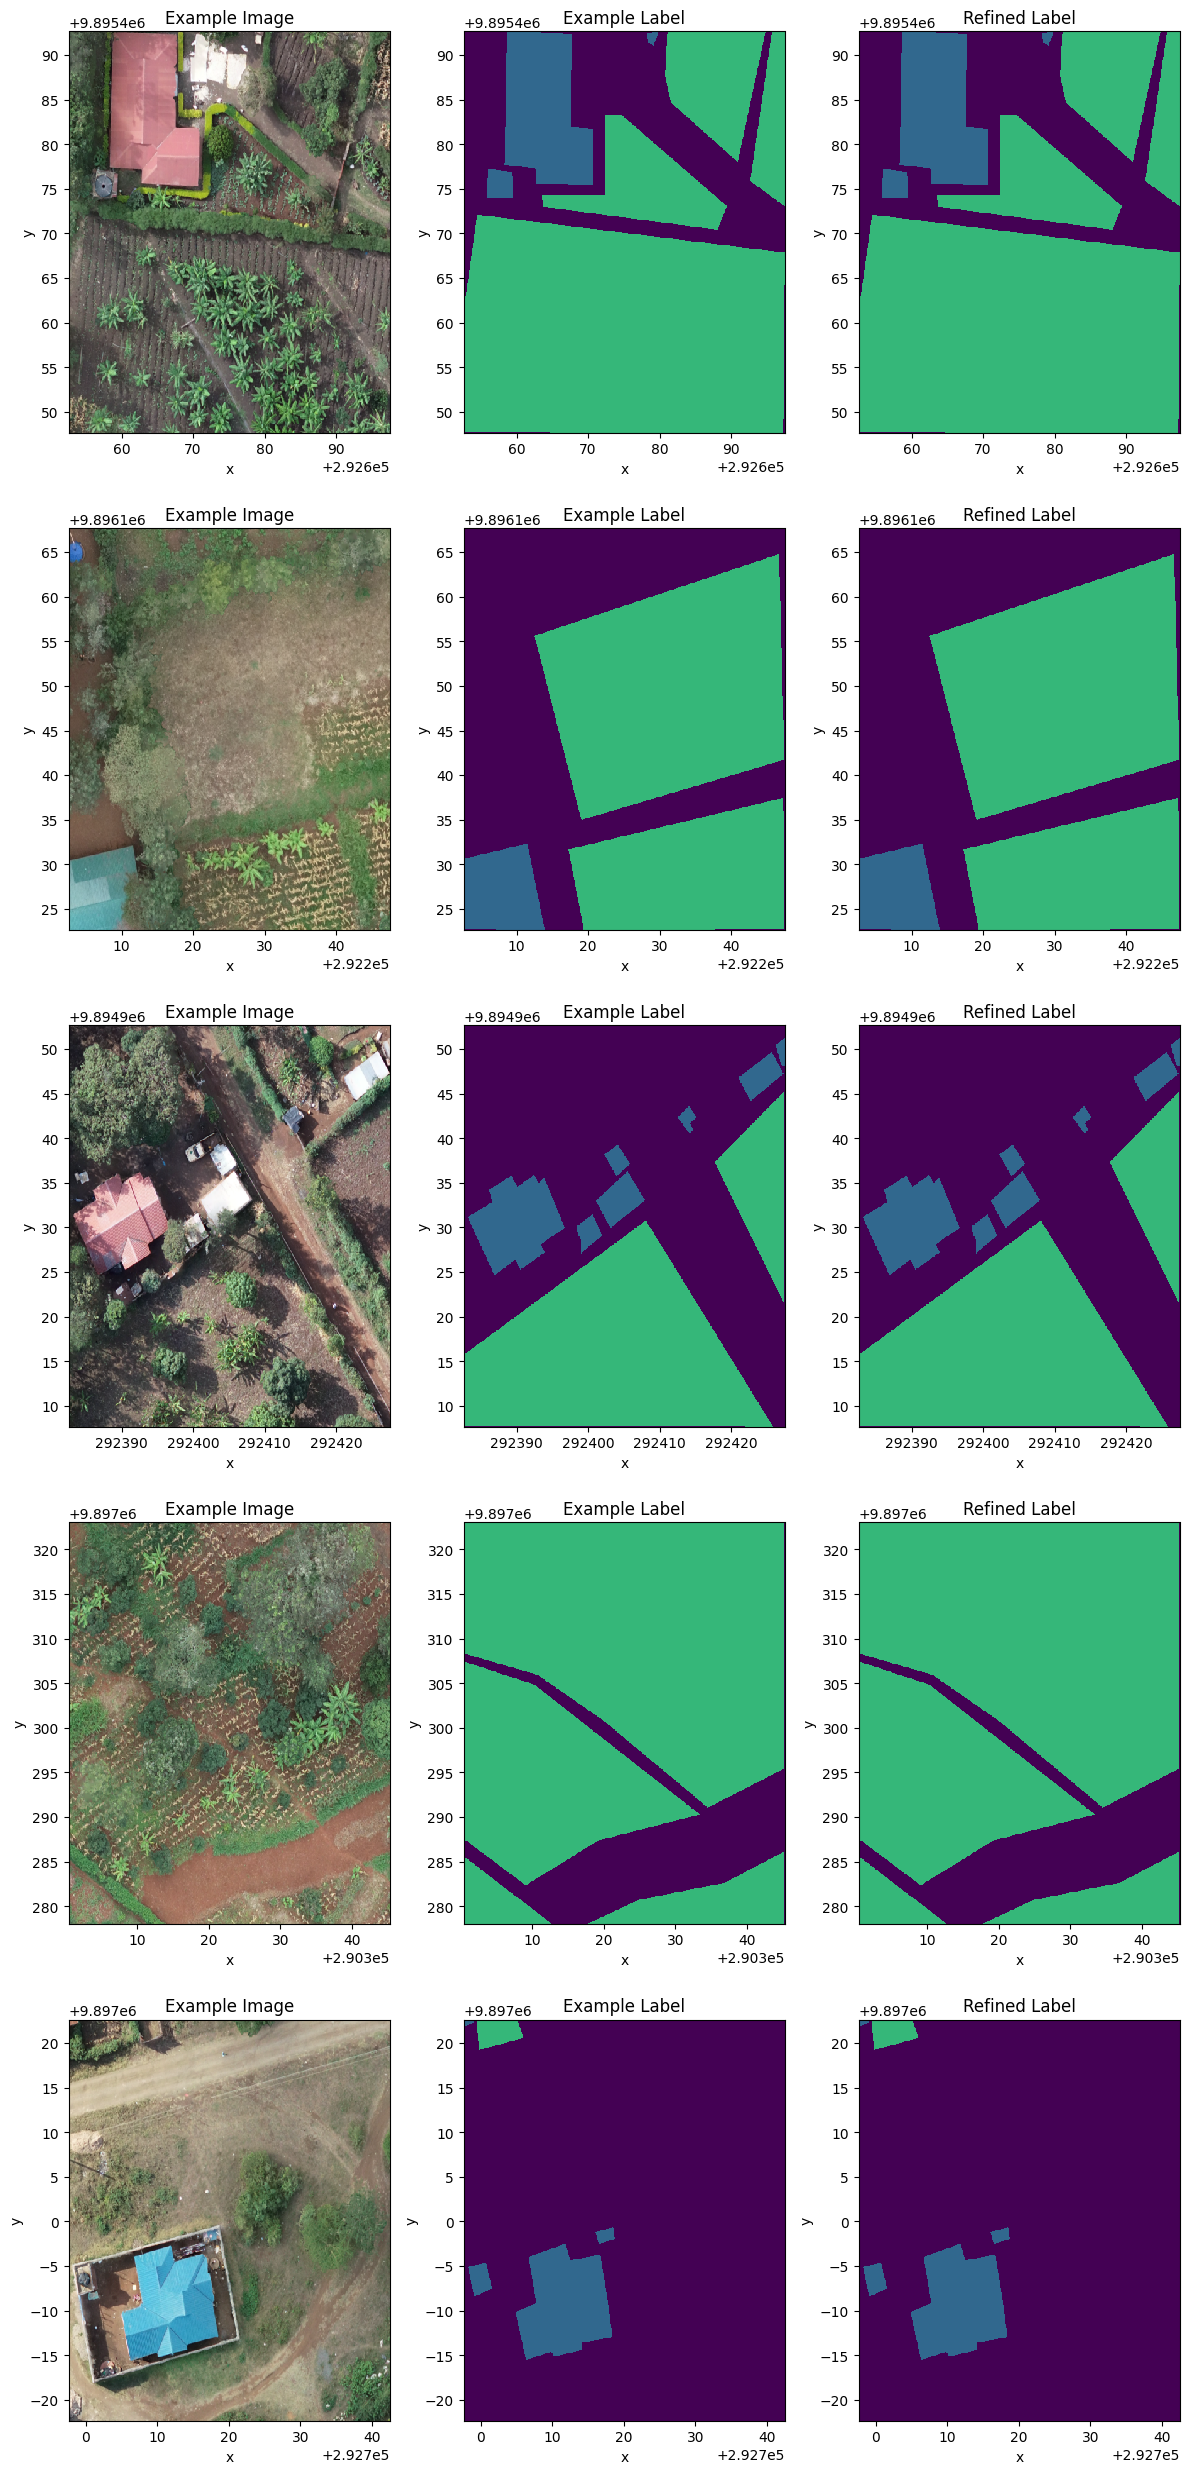

In [25]:
plot_random_predictions(num_plots=5, source_dir = '/home/workdir/kenya_output_skipatt')